In [ ]:
import numpy as np
import pandas as pd
import warnings

In [ ]:
ipl = pd.read_csv('ipl_matches.csv')

In [ ]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
ipl['date']=pd.to_datetime(ipl['date'],format='%d-%m-%Y')

In [ ]:
ipl.isnull().sum()

,0
id,0
Season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [ ]:

from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='most_frequent')
ipl[['city','winner','player_of_match','umpire1','umpire2']]= imputer.fit_transform(ipl[['city','winner','player_of_match','umpire1','umpire2']])

In [ ]:
ipl.isnull().sum()

,0
id,0
Season,0
city,0
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ipl['team1'] = encoder.fit_transform(ipl['team1'])
ipl['team2'] = encoder.fit_transform(ipl['team2'])
ipl['toss_decision'] = encoder.fit_transform(ipl['toss_decision'])

In [ ]:
ipl['winner']= encoder.fit_transform(ipl['winner'])

In [ ]:
number_cols =['win_by_runs','win_by_wickets']
ipl[number_cols].describe()

,win_by_runs,win_by_wickets
count,756.000000,756.000000
mean,13.283069,3.350529
std,23.471144,3.387963
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,4.000000
75%,19.000000,6.000000
max,146.000000,10.000000


In [ ]:
for col in number_cols:
    Q1 = ipl[col].quantile(0.25)
    Q3 = ipl[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(f"Column: {col}")
    print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"  Lower bound for outliers: {lower}")
    print(f"  Upper bound for outliers: {upper}")
    print("-" * 20)
    ipl[col] = np.where((ipl[col] < lower) | (ipl[col] > upper), np.nan, ipl[col])


Column: win_by_runs
  Q1: 0.0, Q3: 19.0, IQR: 19.0
  Lower bound for outliers: -28.5
  Upper bound for outliers: 47.5
--------------------
Column: win_by_wickets
  Q1: 0.0, Q3: 6.0, IQR: 6.0
  Lower bound for outliers: -9.0
  Upper bound for outliers: 15.0
--------------------


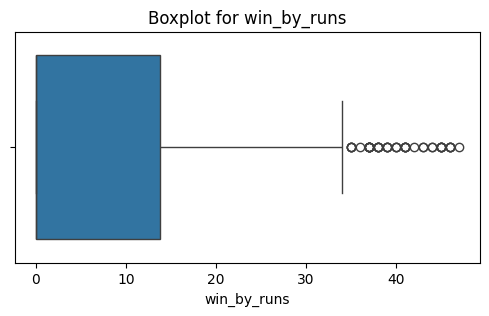

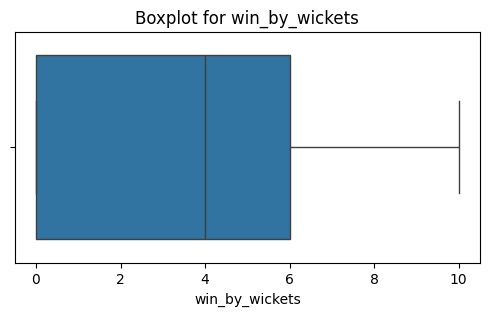

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in number_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=ipl[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [ ]:
ipl['team1'].replace({'Royal Challengers': 'Royal Challengers Bangalore','Delhi Daredevils': 'Delhi Capitals'}, inplace=True)
ipl['team2'].replace({'Royal Challengers': 'Royal Challengers Bangalore','Delhi Daredevils': 'Delhi Capitals'}, inplace=True)

/tmp/ipython-input-132849202.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ipl['team1'].replace({'Royal Challengers': 'Royal Challengers Bangalore','Delhi Daredevils': 'Delhi Capitals'}, inplace=True)
/tmp/ipython-input-132849202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

Here the cleaning approaches of the dataset:
team1,team2 names are encoded using LabelEncoder.
Removed the ouliers by applying IQR.

In [ ]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,2017-04-05,14,13,Royal Challengers Bangalore,1,normal,0,14,35.0,0.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,2017-04-06,8,11,Rising Pune Supergiant,1,normal,0,11,0.0,7.0,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,2017-04-07,4,7,Kolkata Knight Riders,1,normal,0,7,0.0,10.0,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,2017-04-08,11,5,Kings XI Punjab,1,normal,0,5,0.0,6.0,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,2017-04-08,13,3,Royal Challengers Bangalore,0,normal,0,13,15.0,0.0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin,NaN


In [ ]:
teamname ={ }

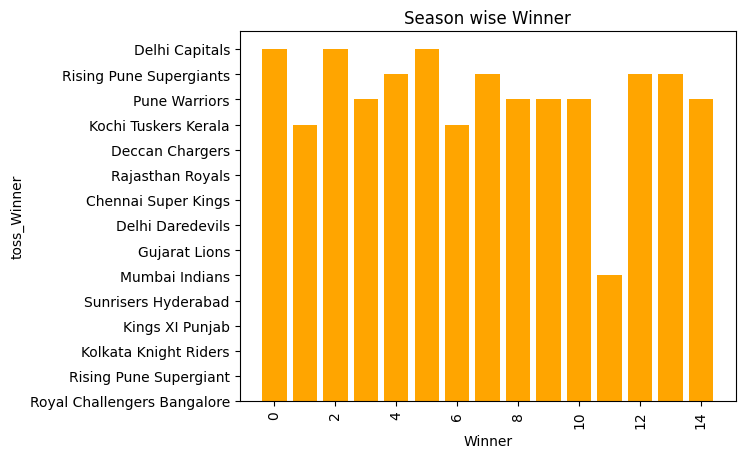

In [ ]:
plt.bar(ipl['winner'],ipl['toss_winner'],color='orange')
plt.xlabel('Winner')
plt.ylabel('toss_Winner')
plt.title('Season wise Winner')
plt.xticks(rotation=90)
plt.show()



# Task
Analyze the relationship between winning the toss and winning the match in the provided dataset.

In [ ]:
toss_and_match_winner = ipl[ipl['toss_winner'] == ipl['winner']]
toss_winner_wins = len(toss_and_match_winner)
total_matches = len(ipl)
toss_winner_losses = total_matches - toss_winner_wins
print(f"Number of matches where toss winner also won: {toss_winner_wins}")
print(f"Number of matches where toss winner lost: {toss_winner_losses}")

Number of matches where toss winner also won: 0
Number of matches where toss winner lost: 756



A visualization to clearly show the relationship between winning the toss and winning the match.


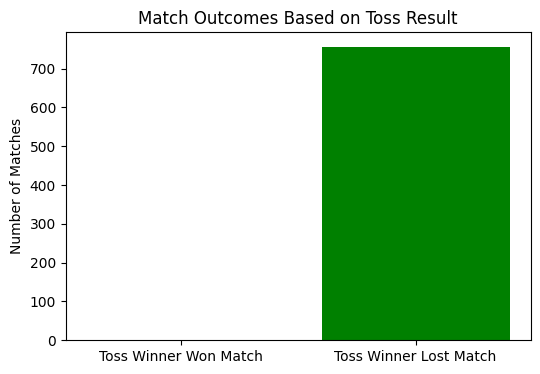

In [ ]:

counts = [toss_winner_wins, toss_winner_losses]
labels = ['Toss Winner Won Match', 'Toss Winner Lost Match']
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['blue', 'green'])
plt.title('Match Outcomes Based on Toss Result')
plt.ylabel('Number of Matches')
plt.show()

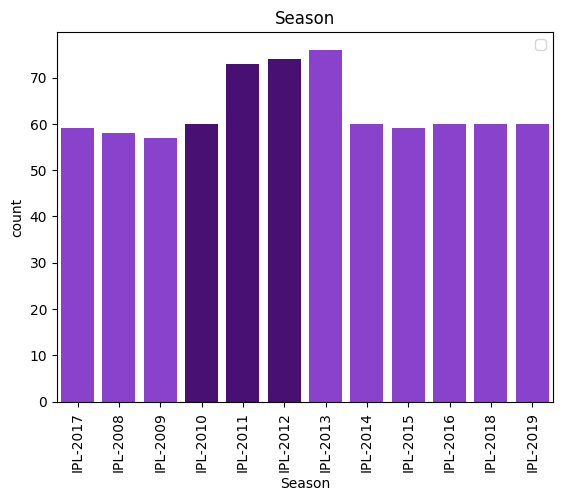

In [ ]:
color =["blueviolet","blueviolet","blueviolet","indigo","indigo","indigo","blueviolet","blueviolet","blueviolet","blueviolet","blueviolet","blueviolet"]

sns.countplot( x = "Season", data = ipl, hue = "Season",palette = color)

plt.title("Season")

plt.legend([])
plt.xticks(rotation=90)
plt.show()

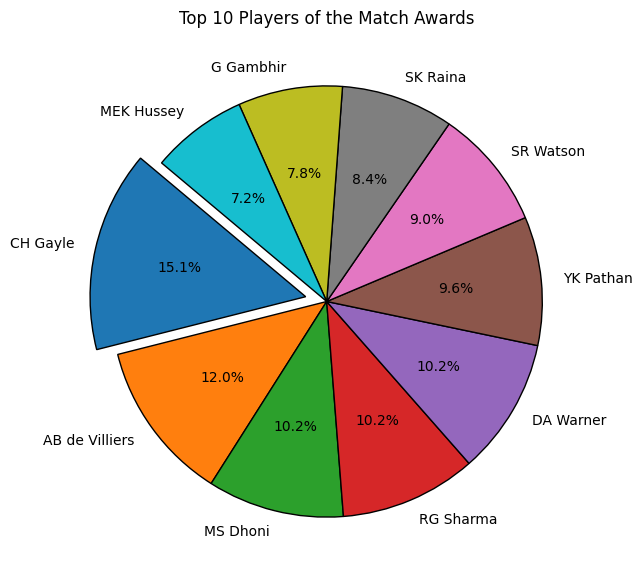

In [ ]:
top_players = ipl["player_of_match"].value_counts().nlargest(10)
explode = [0.1 if i == 0 else 0 for i in range(len(top_players))]
plt.figure(figsize=(7,7))
plt.pie(top_players ,labels=top_players.index , autopct="%1.1f%%" , startangle=140 , explode=explode , colors=plt.cm.tab10.colors , wedgeprops={"edgecolor":"black"})
plt.title("Top 10 Players of the Match Awards")
plt.show()

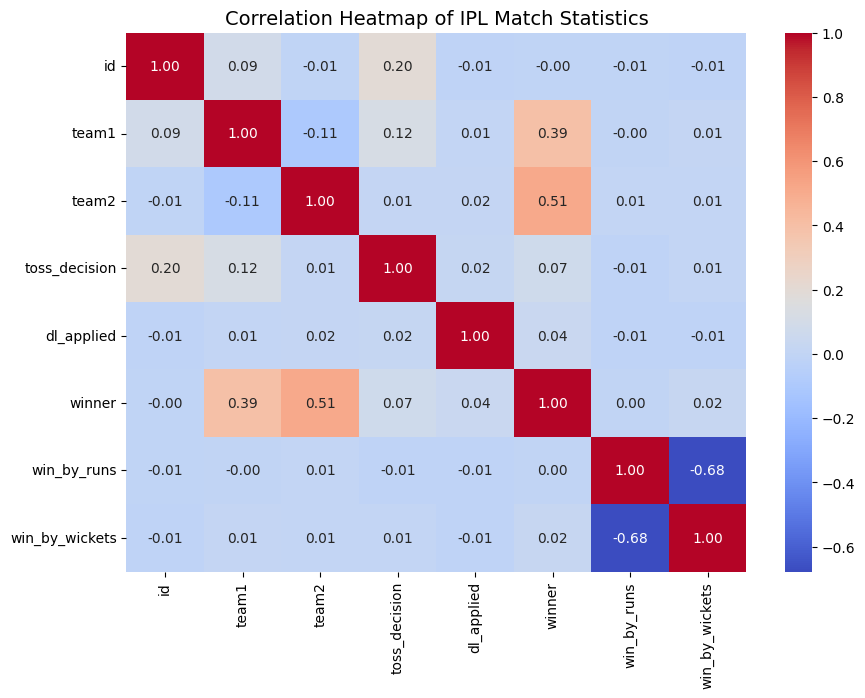

In [ ]:
numeric = ipl.select_dtypes(include='number')
plt.figure(figsize=(10,7))
sns.heatmap(numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of IPL Match Statistics", fontsize=14)
plt.show()

/tmp/ipython-input-327727157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="city", data=ipl, order=ipl["city"].value_counts().index, palette="cividis")


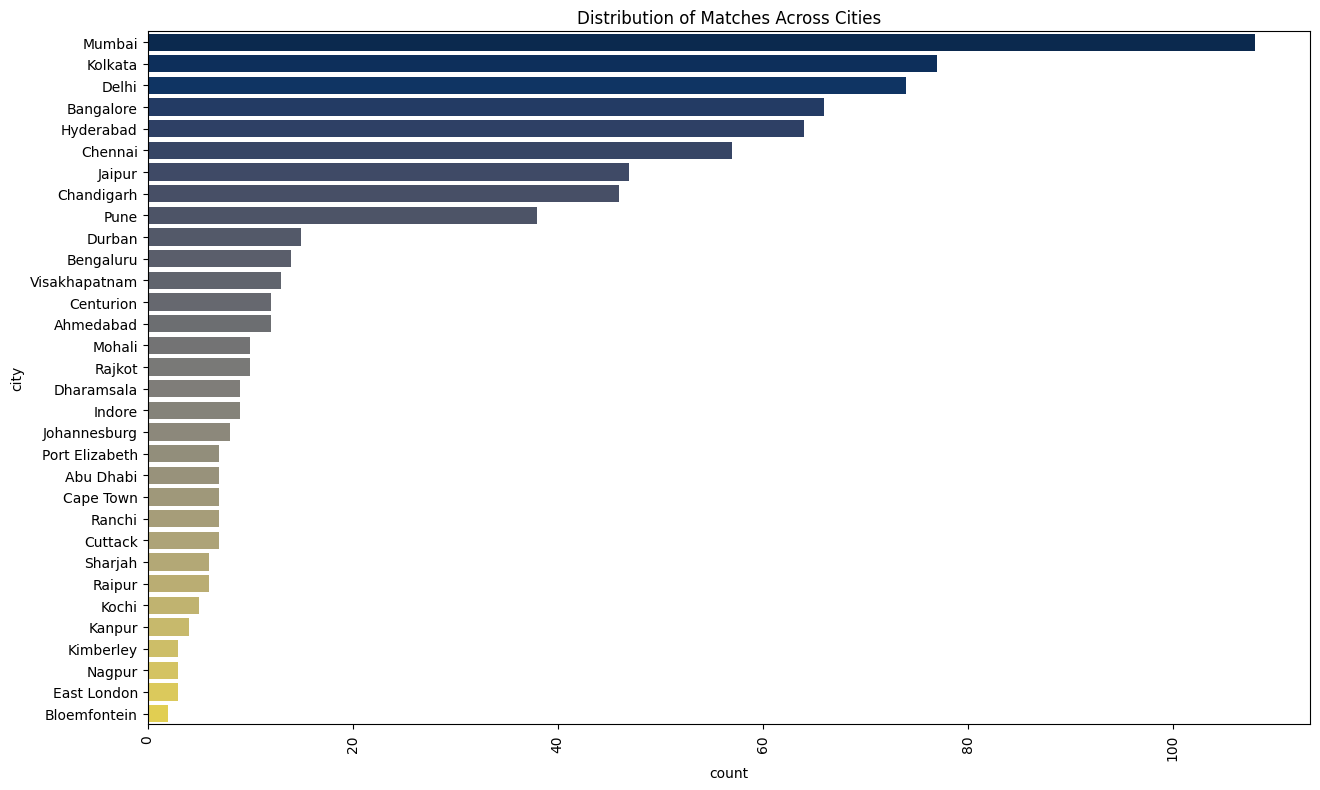

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(y="city", data=ipl, order=ipl["city"].value_counts().index, palette="cividis")
plt.xticks(rotation=90)
plt.title("Distribution of Matches Across Cities")
plt.show()

In [ ]:
venue_toss_decisions = ipl.groupby('venue')['toss_decision'].value_counts().unstack().fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = ipl.drop(columns=['winner', 'id', 'date','umpire1','umpire2','player_of_match'])
y = ipl['winner']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42,stratify=y)

In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

Model Training

In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedGroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from  sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr = lr.predict(X_test_scaled)
print('accuracy :',accuracy_score(y_test,y_pred_lr))
print('classification Report\n',classification_report(y_test,y_pred_lr))
warnings.filterwarnings("ignore", category=UserWarning)

accuracy : 0.3684210526315789
classification Report
               precision    recall  f1-score   support

           0       0.67      0.62      0.64        26
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         1
           3       0.15      0.22      0.18         9
           4       0.67      1.00      0.80         4
           5       0.22      0.35      0.27        17
           6       0.00      0.00      0.00         0
           7       0.44      0.32      0.37        22
           8       0.40      0.42      0.41        19
           9       0.00      0.00      0.00         4
          10       0.58      0.50      0.54        14
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.15      0.25      0.19        12
          14       0.38      0.25      0.30        12

    accuracy                           0.37       152
   macro avg       0.24    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [ ]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.39473684210526316

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.46      0.52        26
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         1
           3       0.21      0.44      0.29         9
           4       0.80      1.00      0.89         4
           5       0.32      0.53      0.40        17
           7       0.45      0.23      0.30        22
           8       0.42      0.58      0.49        19
           9       0.00      0.00      0.00         4
          10       0.64      0.64      0.64        14
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         3
          13       0.12      0.17      0.14        12
          14       0.50      0.25      0.33        12

    accuracy                           0.39       152
   macro avg       0.36      0.34      0.33       152
weighted avg       0.41  

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred = KNN.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.3881578947368421

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.50      0.46        26
           1       0.40      0.29      0.33         7
           2       0.00      0.00      0.00         1
           3       0.21      0.44      0.29         9
           4       0.57      1.00      0.73         4
           5       0.35      0.47      0.40        17
           6       0.00      0.00      0.00         0
           7       0.43      0.27      0.33        22
           8       0.38      0.47      0.42        19
           9       0.00      0.00      0.00         4
          10       0.57      0.57      0.57        14
          11       1.00      0.50      0.67         2
          12       1.00      0.33      0.50         3
          13       0.17      0.08      0.11        12
          14       0.33      0.17      0.22        12

    accuracy                           0.39       152
   macro avg       0.39   

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)
y_pred = DT.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.7302631578947368

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.40      0.29      0.33         7
           2       0.00      0.00      0.00         1
           3       0.55      0.67      0.60         9
           4       1.00      1.00      1.00         4
           5       0.87      0.76      0.81        17
           6       0.00      0.00      0.00         0
           7       0.80      0.73      0.76        22
           8       0.64      0.84      0.73        19
           9       0.00      0.00      0.00         4
          10       0.73      0.79      0.76        14
          11       0.25      0.50      0.33         2
          12       1.00      0.33      0.50         3
          13       0.73      0.92      0.81        12
          14       0.75      0.50      0.60        12

    accuracy                           0.73       152
   macro avg       0.58   

In [ ]:
Rand = RandomForestClassifier()
Rand.fit(X_train_scaled, y_train)
y_pred = Rand.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.5855263157894737

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.67      0.29      0.40         7
           2       1.00      1.00      1.00         1
           3       0.46      0.67      0.55         9
           4       1.00      0.75      0.86         4
           5       0.44      0.47      0.46        17
           6       0.00      0.00      0.00         0
           7       0.62      0.59      0.60        22
           8       0.48      0.63      0.55        19
           9       0.00      0.00      0.00         4
          10       0.62      0.57      0.59        14
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         3
          13       0.50      0.67      0.57        12
          14       0.67      0.50      0.57        12

    accuracy                           0.59       152
   macro avg       0.55   

In [ ]:
XG = XGBClassifier()
XG.fit(X_train_scaled, y_train)
y_pred = XG.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      0.71      0.83         7
           2       1.00      1.00      1.00         1
           3       1.00      0.89      0.94         9
           4       1.00      1.00      1.00         4
           5       0.85      1.00      0.92        17
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00        22
           8       0.95      1.00      0.97        19
           9       1.00      0.50      0.67         4
          10       0.93      1.00      0.97        14
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         3
          13       0.92      1.00      0.96        12
          14       0.92      1.00      0.96        12

    accuracy                           0.95       152
   macro avg       0.84   

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
models = [lr,svm,KNN,DT,Rand,XG]
cv =StratifiedGroupKFold(n_splits=5,shuffle=True,random_state=42)
results=[]
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    results.append({'Model': type(model).__name__, 'Accuracy': scores.mean(), 'Standard Deviation': scores.std()})
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Accuracy', ascending=False))

                    Model  Accuracy  Standard Deviation
5           XGBClassifier  0.923815            0.017778
3  DecisionTreeClassifier  0.660468            0.120312
4  RandomForestClassifier  0.642259            0.059433
0      LogisticRegression  0.453581            0.025322
2    KNeighborsClassifier  0.438774            0.035451
1                     SVC  0.422218            0.027639


Training model: Logistic Regression


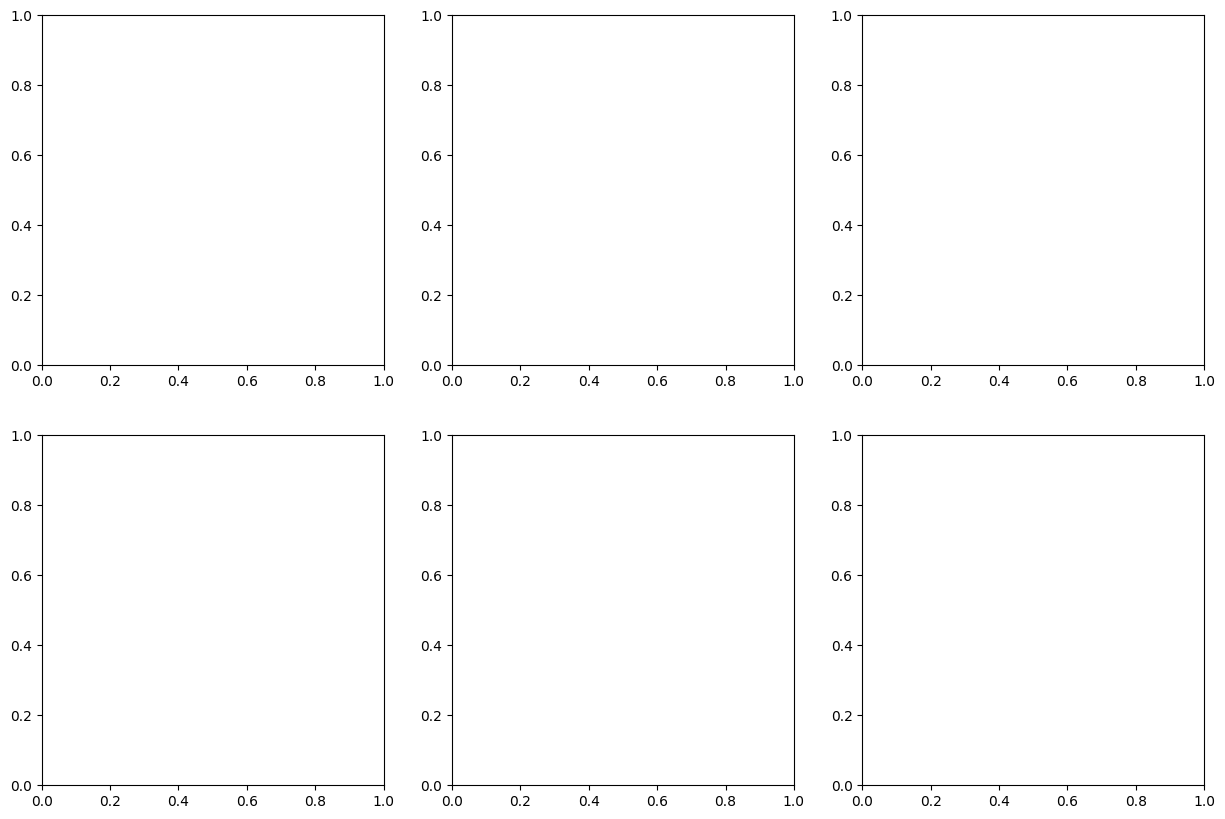

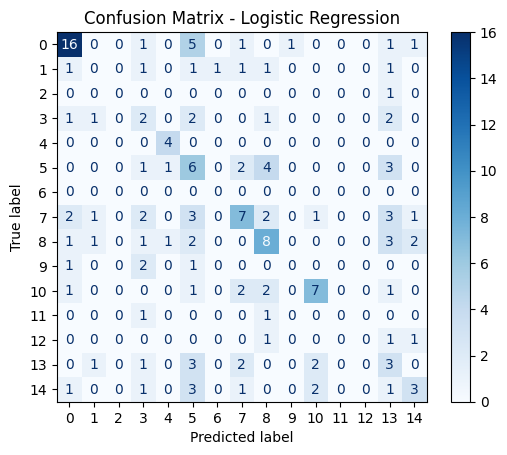

Training model: SVC


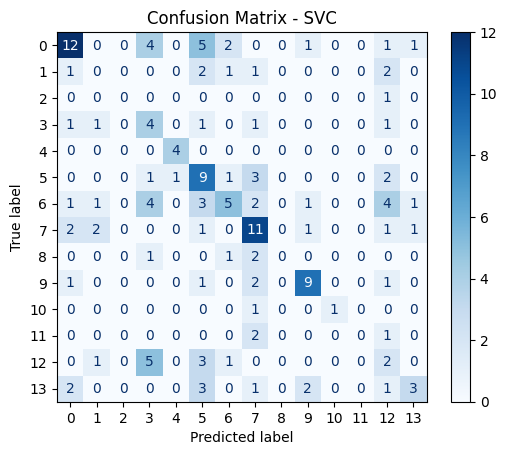

Training model: KNN


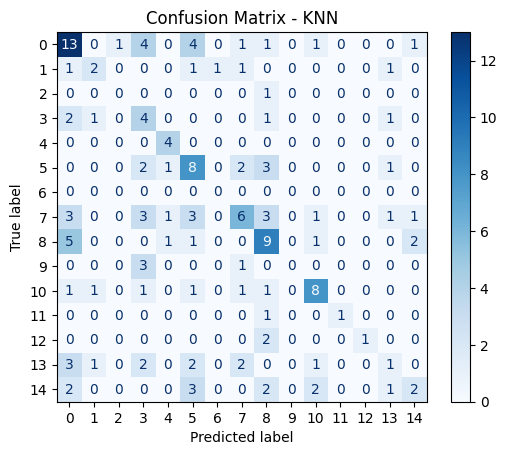

Training model: Decision Tree


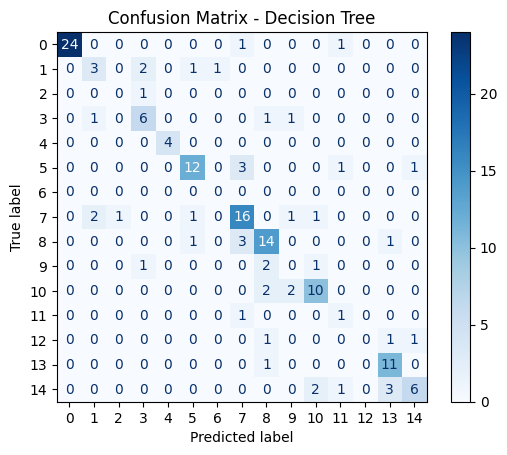

Training model: Random Forest


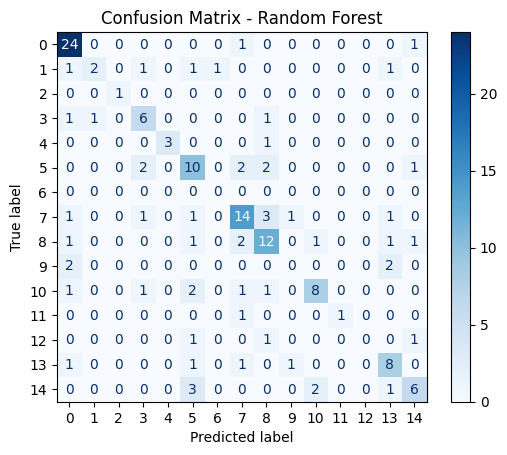

Training model: XGBoost


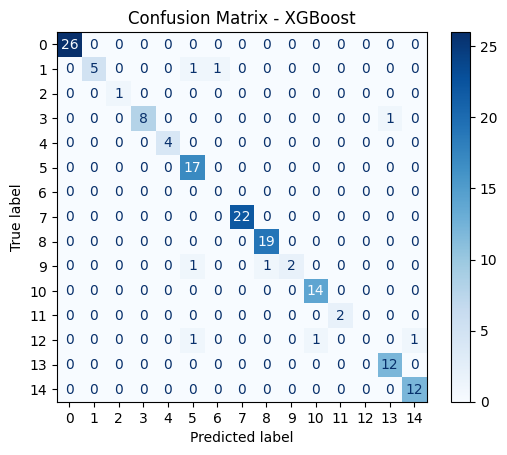

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
models_dict = {'Logistic Regression': lr,'SVC': svm,'KNN': KNN,'Decision Tree': DT,'Random Forest': Rand,'XGBoost': XG}
for name, model in models_dict.items():
    print(f"Training model: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


In [ ]:

from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore", category=UserWarning)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
param_grid = {'n_estimators': [100, 200],'max_depth': [3, 5, 7],'learning_rate': [0.05, 0.1],'subsample': [0.8, 1],'colsample_bytree': [0.8, 1]}
grid_search = GridSearchCV(estimator=xgb,param_grid=param_grid,scoring='accuracy',cv=3,n_jobs=-1,verbose=1)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
Best CV Accuracy: 0.9387140206557968

Test Accuracy: 0.9605263157894737

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      0.71      0.83         7
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         4
           5       0.94      1.00      0.97        17
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00        22
           8       0.95      1.00      0.97        19
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         2
          12       0.0

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
team_mapping = {
    1: 'Chennai Super Kings',2: 'Delhi Capitals',3: 'Kolkata Knight Riders',4: 'Mumbai Indians',5: 'Kings XI Punjab',6: 'Rajasthan Royals',7: 'Royal Challengers Bangalore',8: 'Sunrisers Hyderabad',9: 'Gujarat Titans',
    10: 'Lucknow Super Giants',11: 'Deccan Chargers',12: 'Pune Warriors',13: 'Rising Pune Supergiant',14: 'Kochi Tuskers Kerala'}
new_match = {"Year": [2026],"city": [8],"team1": [3],"team2": [7],"toss_winner": [9],"toss_decision": [1],"result": [2],"win_by_runs": [35],"win_by_wickets": [0],"venue": [1]}
new_match_df = pd.DataFrame(new_match)
new_match_encoded = pd.get_dummies(new_match_df, drop_first=True)
new_match_encoded = new_match_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
new_match_scaled = scaler.transform(new_match_encoded)
y_proba = best_model.predict_proba(new_match_scaled)[0]
team1 = new_match['team1'][0]
team2 = new_match['team2'][0]
team_probabilities = {team1: y_proba[team1 - 1],team2: y_proba[team2 - 1]}
predicted_team_id = max(team_probabilities, key=team_probabilities.get)
predicted_team_name = team_mapping[predicted_team_id]
print("Predicted winner:", predicted_team_name)


Predicted winner: Kolkata Knight Riders
